In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
train=pd.read_csv("trainp3.csv")

In [2]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression# for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import Imputer

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train=train.replace(-1, np.nan)

In [4]:
train=train.fillna(train.mean(), inplace=True)

In [5]:
train.describe()

,Unnamed: 0,House ID,bathrooms,bedrooms,blessings,builder,capital_distance,dateb,dining_rooms,dock_distance,...,holy_tree,king_visited,knights_house_distance,location,market_distance,renovation,river_distance,sorceror_cursed,tower_distance,golden_grains
count,16500.000000,1.650000e+04,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,0.0,16500.000000,16500.000000,...,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,1.650000e+04
mean,8249.500000,1.848856e+09,3.007209,3.001514,115.142545,4.008338,42.674021,NaN,3.001615,46.305520,...,0.870107,0.085030,53.169633,2.671387,48.715817,0.195817,30.288848,0.850664,101.110421,1.306901e+06
std,4763.284056,1.898740e+04,0.796044,0.797443,34.806516,2.376687,33.489311,NaN,0.774775,33.338223,...,0.301089,0.278935,33.490791,0.889960,32.370184,0.376742,22.036027,0.345482,65.285441,1.628483e+05
min,0.000000,1.848823e+09,2.000000,2.000000,3.000000,0.000000,0.000714,NaN,2.000000,0.000288,...,0.000000,0.000000,10.035601,1.000000,0.011985,0.000000,0.007765,0.000000,0.012093,6.250830e+05
25%,4124.750000,1.848840e+09,2.000000,2.000000,90.000000,3.000000,15.730341,NaN,2.000000,19.818220,...,0.870107,0.000000,26.223188,2.000000,23.922671,0.000000,12.515697,1.000000,48.748405,1.208923e+06
50%,8249.500000,1.848856e+09,3.000000,3.000000,124.000000,3.000000,36.092090,NaN,3.000000,43.760487,...,1.000000,0.000000,46.584263,3.000000,48.715817,0.000000,25.352928,1.000000,94.973900,1.330423e+06
75%,12374.250000,1.848873e+09,4.000000,4.000000,144.000000,6.000000,61.759625,NaN,4.000000,64.226306,...,1.000000,0.000000,72.343745,3.000000,65.053574,0.195817,44.503404,1.000000,144.173678,1.425944e+06
max,16499.000000,1.848889e+09,4.000000,4.000000,160.000000,9.000000,156.893349,NaN,4.000000,157.658673,...,1.000000,1.000000,167.131365,4.000000,157.857240,1.000000,99.260600,1.000000,297.334188,1.747559e+06


In [8]:
X = train[['House ID','garden','dock_distance','capital_distance','market_distance','tower_distance','river_distance','renovation','dining_rooms','bedrooms','bathrooms','king_visited','sorceror_cursed','blessings','farm','location','holy_tree','knights_house_distance','golden_grains']]
Y = train['golden_grains']

In [9]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

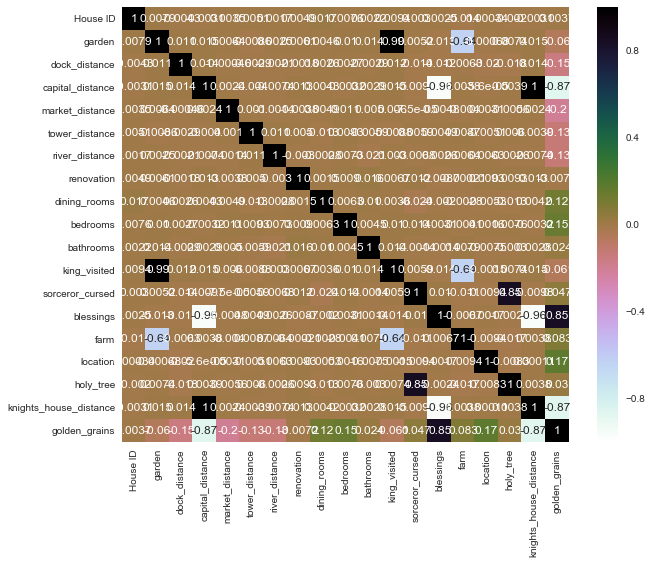

In [10]:
plt.figure(figsize=(10,8)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [11]:
test=pd.read_csv('testp3.csv')

In [12]:
features=['House ID','builder','garden','dock_distance','capital_distance','market_distance','tower_distance','river_distance','renovation','dining_rooms','bedrooms','bathrooms','king_visited','sorceror_cursed','blessings','farm','location','holy_tree','knights_house_distance']

In [13]:
train_X = train[features]# taking the training data features
train_y = train.golden_grains# output of our training data
test_X = test[features] # taking test data features
#test_y = test1.golden_grains   #output value of test data

In [14]:
model = GradientBoostingRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
#mean_squared_error(prediction, test_y)

In [15]:
raw_data={'Golden_grains' : prediction}
df = pd.DataFrame(raw_data, columns = ['Golden_grains'])
df.to_csv('answer3.csv')